Scraping New York Times News Articles <br>
Website link: [nytimes.com](https://nytimes.com)


Scrape article metadata and comments from NYTimes

In [1]:
!pip install nytimes-scraper

     |████████████████████████████████| 92kB 3.2MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115928 sha256=c9fad3f882f76f946c3ecd418f360b0709950894f6d52157d5918d28f81b6764
  Stored in directory: /root/.cache/pip/wheels/af/19/30/1ea0cad502dcb4e66ed5a690279628c827aea38bbbab75d5ed
Successfully built fire


In [10]:
import datetime as dt
from nytimes_scraper.nyt_api import NytApi
from nytimes_scraper.articles import fetch_articles_by_month, articles_to_df
from nytimes_scraper.comments import fetch_comments, fetch_comments_by_article, comments_to_df

api_key = "4g1zTdzosZ7PSqm7TzSXhPQJuY5IbsJU"
api = NytApi(api_key)

comments_b = fetch_comments(api, article_ids_and_urls=[
    ('nyt://article/316ef65c-7021-5755-885c-a9e1ef2cfdf2', 'https://www.nytimes.com/2020/01/03/world/middleeast/trump-iran-suleimani.html'),
    ('nyt://article/b2d1b802-412e-51f7-8864-efc931e87bb3', 'https://www.nytimes.com/2020/01/04/opinion/impeachment-witnesses.html'),
])




  0%|          | 0/2 [00:00<?, ?Article/s]


 50%|█████     | 1/2 [00:57<00:57, 57.76s/Article]


100%|██████████| 2/2 [01:39<00:00, 49.88s/Article]


In [12]:
comments_c = comments_to_df(comments_b)

In [14]:
req_cols = ["userLocation", "commentBody", "createDate", "recommendations", "replyCount", "commentType", "articleID"]
comments_df = comments_c[req_cols]

In [15]:
comments_df.size

14567

In [16]:
comments_df

,userLocation,commentBody,createDate,recommendations,replyCount,commentType,articleID
commentID,,,,,,,
104419446,Cheltenham PA,I don’t think Trump had a choice. And if Iran...,2020-01-03 14:50:19,17,15,comment,nyt://article/316ef65c-7021-5755-885c-a9e1ef2c...
104419689,TEJAS,He always has a choice and this time he did no...,2020-01-03 15:02:17,11,0,userReply,nyt://article/316ef65c-7021-5755-885c-a9e1ef2c...
104419879,"Phoenix, AZ",@ Michael Livingston’s you are wrong. There’s ...,2020-01-03 15:11:05,84,0,userReply,nyt://article/316ef65c-7021-5755-885c-a9e1ef2c...
104419929,NH,@Michael Livingston’s \nDon't forget how the f...,2020-01-03 15:12:59,117,0,userReply,nyt://article/316ef65c-7021-5755-885c-a9e1ef2c...
104419839,"Takoma Park, MD",@Michael Livingston’s \n\nI don't think that T...,2020-01-03 15:09:20,37,0,userReply,nyt://article/316ef65c-7021-5755-885c-a9e1ef2c...
...,...,...,...,...,...,...,...
104455126,"calgary, alberta",NOBODY CARES!\n\nHonestly it's not going to ch...,2020-01-05 21:02:18,5,0,comment,nyt://article/b2d1b802-412e-51f7-8864-efc931e8...
104455627,Toronto,Trump: “I want them to testify in the Senate w...,2020-01-05 22:12:54,35,0,comment,nyt://article/b2d1b802-412e-51f7-8864-efc931e8...
104455082,NC,The president can shoot someone on 5th avenue ...,2020-01-05 20:56:47,46,0,comment,nyt://article/b2d1b802-412e-51f7-8864-efc931e8...


## NewsAPI

In [17]:
import requests
from bs4 import BeautifulSoup
import pprint
import pandas as pd
import numpy as np

In [18]:
url = "https://newsapi.org/v2/everything"
api_key = "ee93b76bdcf94864a2bb399229216d88"

In [54]:
search_term = input("Enter a search keyword: ")

Enter a search keyword: data science


In [55]:
params = {
    'q': search_term,
    'pageSize': 25,
    'apiKey': api_key,
    'from': '2021-03-15'
}

response = requests.get(url, params = params)
response_json = response.json()

In [ ]:
response_json

In [57]:
response_json.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [45]:
response_json['totalResults']

394395

In [58]:
search_articles = response_json['articles']

In [59]:
def get_articles(file):
  article_results = []

  for i in range(len(file)):
    article_dict = {}
    article_dict['title'] = file[i]['title']
    article_dict['author'] = file[i]['author']
    article_dict['source'] = file[i]['source']
    article_dict['description'] = file[i]['content']
    article_dict['pub_date'] = file[i]['publishedAt']
    article_dict['url'] = file[i]['url']
    article_dict['photo_url'] = file[i]['urlToImage']

    article_results.append(article_dict)
    
  return article_results

In [60]:
# creating a pandas dataframe
search_df = pd.DataFrame(get_articles(search_articles))

In [62]:
search_df.head()

,title,author,source,description,pub_date,url,photo_url
0,How to recruit data scientists without paying ...,Walter Thompson,"{'id': 'techcrunch', 'name': 'TechCrunch'}",More posts by this contributor\r\nWhen it come...,2021-03-17T20:08:53Z,http://techcrunch.com/2021/03/17/how-to-recrui...,https://techcrunch.com/wp-content/uploads/2021...
1,Aiming to become the definitive source for loc...,Anthony Ha,"{'id': 'techcrunch', 'name': 'TechCrunch'}",While there are plenty of companies selling da...,2021-03-16T16:02:50Z,http://techcrunch.com/2021/03/16/safegraph-ser...,https://techcrunch.com/wp-content/uploads/2020...
2,This $40 computer science training includes cl...,https://www.engadget.com/about/editors/stack-c...,"{'id': 'engadget', 'name': 'Engadget'}","Learning foundational IT, data science or prog...",2021-03-25T14:55:56Z,https://www.engadget.com/2021-complete-compute...,https://s.yimg.com/os/creatr-uploaded-images/2...
3,Learn the basics of data science with this sta...,Joseph Green,"{'id': 'mashable', 'name': 'Mashable'}","TL;DR: The Complete Excel, VBA, and Data Scien...",2021-03-15T05:00:00Z,https://mashable.com/uk/shopping/march-15-data...,https://mondrian.mashable.com/2021%252F03%252F...
4,Expand your job opportunities with computer sc...,Jae Thomas,"{'id': 'mashable', 'name': 'Mashable'}","TL;DR: Brush up on coding, data science, and m...",2021-03-23T09:00:00Z,https://mashable.com/shopping/march-23-2021-co...,https://mondrian.mashable.com/2021%252F03%252F...


In [63]:
# formatting source
def source_getter(df):
  source = []
  for source_dict in df['source']:
    source.append(source_dict['name'])
  df['source'] = source

In [64]:
source_getter(search_df)

In [65]:
search_df.shape

(25, 7)

In [68]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [69]:
search_df

,title,author,source,description,pub_date,url,photo_url
0,How to recruit data scientists without paying top dollar,Walter Thompson,TechCrunch,"More posts by this contributor\r\nWhen it comes to building a data science team, many companies fail at the first step creating a job posting. These mistakes have been amplified in the age of COVID-19.… [+3674 chars]",2021-03-17T20:08:53Z,http://techcrunch.com/2021/03/17/how-to-recruit-data-scientists-without-paying-top-dollar/,https://techcrunch.com/wp-content/uploads/2021/03/GettyImages-1213043174.jpg?w=600
1,"Aiming to become the definitive source for location data, SafeGraph raises $45M",Anthony Ha,TechCrunch,"While there are plenty of companies selling data about physical locations, SafeGraph CEO Auren Hoffman said his startup is one of the few companies to sell this data to data science teams.\r\nFor the m… [+2386 chars]",2021-03-16T16:02:50Z,http://techcrunch.com/2021/03/16/safegraph-series-b/,https://techcrunch.com/wp-content/uploads/2020/02/GettyImages-868376176.jpg?w=600
2,"This $40 computer science training includes classes on Python, Linux and more",https://www.engadget.com/about/editors/stack-commerce,Engadget,"Learning foundational IT, data science or programming skills is necessary if you want to work in a technical field, but using them outside of these environments can benefit your productivity and effi… [+2008 chars]",2021-03-25T14:55:56Z,https://www.engadget.com/2021-complete-computer-science-training-bundle-145556015.html,https://s.yimg.com/os/creatr-uploaded-images/2021-03/66df4a10-8bf5-11eb-9efd-1d5d2561882e
3,Learn the basics of data science with this stacked online training bundle,Joseph Green,Mashable,"TL;DR: The Complete Excel, VBA, and Data Science Certification Training Bundle is on sale for £32.27 as of March 15, saving you 98% on list price.\r\nAnyone looking to make this promising career change… [+1041 chars]",2021-03-15T05:00:00Z,https://mashable.com/uk/shopping/march-15-data-science-online-couses/,https://mondrian.mashable.com/2021%252F03%252F15%252Fa6%252Fd0ffe2e7098340e5a1a22f6020a53801.a4ecb.jpg%252F1200x630.jpg?signature=Q3ACYeLeQ47qt4TFLd_gv5tZSro=
4,Expand your job opportunities with computer science courses on sale,Jae Thomas,Mashable,"TL;DR: Brush up on coding, data science, and more with the 2021 Complete Computer Science Training Bundle. As of March 23, get the full bundle for only $39.99.\r\nComputer science is always evolving. I… [+1811 chars]",2021-03-23T09:00:00Z,https://mashable.com/shopping/march-23-2021-complete-computer-science-training-bundle/,https://mondrian.mashable.com/2021%252F03%252F23%252Fec%252F3042ad8bdb894cd389fc7fd089f370f1.cd3c2.jpg%252F1200x630.jpg?signature=7mEmurHacyjvWuwMH4CkjFL0xEE=
5,Adjusted AstraZeneca data shows COVID-19 vaccine 76 percent effective,Nicole Wetsman,The Verge,"Federal officials publicly rebuked the company earlier this week\r\nIllustration by Alex Castro / The Verge\r\nAstraZeneca released updated data on its COVID-19 vaccine, saying a more recent analysis sho… [+2413 chars]",2021-03-25T12:35:54Z,https://www.theverge.com/2021/3/25/22346706/covid-vaccine-astrazeneca-data-niaid-effective,https://cdn.vox-cdn.com/thumbor/jfkZWS8mK3qGxWf2P0wPVG6r_hQ=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22357718/acastro_210309_1777_vaccine_0002.jpg
6,Aporia raises $5M for its AI observability platform,Frederic Lardinois,TechCrunch,"Machine learning (ML) models are only as good as the data you feed them. That’s true during training, but also once a model is put in production. In the real world, the data itself can change as new … [+3341 chars]",2021-04-06T13:00:40Z,http://techcrunch.com/2021/04/06/aporia-raises-5m-for-its-ai-observability-platform/,https://techcrunch.com/wp-content/uploads/2021/04/Aporia-Team.jpg?w=600
7,"Deep science: AI is in the air, water, soil and steel",Devin Coldewey,TechCrunch,"Research papers come out far too rapidly for anyone to read them all, especially in t

## Building a word cloud

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
text_combined = ''
  
for i in response_json['articles']:
      
    if i['description'] != None:
        text_combined += i['description'] + ' '
          
wordcount={}
for word in text_combined.split():
    if word not in wordcount:
        wordcount[word] = 1
    else:
        wordcount[word] += 1
  
for k,v, in sorted(wordcount.items(),
                   key=lambda words: words[1], 
                   reverse = True):
    print(k,v)

In [73]:
# initializing bad_chars_list 
stop_words = ["a", "the" , "of", "in", "to", "and", "on", "de", "with", 
             "by", "at", "dans", "ont", "été", "les", "des", "au", "et", 
             "après", "avec", "qui", "par", "leurs", "ils", "a", "pour", 
             "les", "on", "as", "france", "eux", "où", "son", "le", "la",
             "en", "with", "is", "has", "for", "that", "an", "but", "be", 
             "are", "du", "it", "à", "had", "ist", "Der", "um", "zu", "den", 
             "der", "-", "und", "für", "Die", "von", "als",
             "sich", "nicht", "nach", "auch"  ]

In [ ]:
r = text_combined.replace('\s+',' ').replace(',', ' ').replace('.',' ')
words = r.split()
rst = [word for word in words if 
       ( word.lower() not in stop_words 
        and len(word) > 3) ]
  
rst = ' '.join(rst)
   
wordcount={}
  
for word in rst.split():
      
    if word not in wordcount:
        wordcount[word] = 1
    else:
        wordcount[word] += 1
   
for k,v, in sorted(wordcount.items(),
                   key=lambda words: words[1],
                   reverse = True):
    print(k,v)

## plotting the word cloud

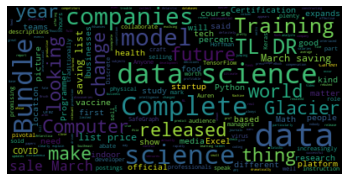

In [76]:
word = WordCloud(max_font_size = 40).generate(rst)
plt.figure()
plt.imshow(word, interpolation ="bilinear")
plt.axis("off")
plt.show()

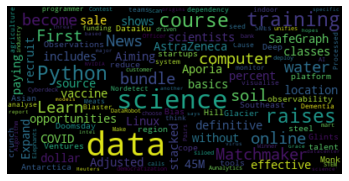

In [77]:
title_combined = ''
  
for i in response_json['articles']:
    title_combined += i['title'] + ' '
      
titles = title_combined.replace('\s+',' ').replace(',',' ').replace('.',' ')
words_t = titles.split()
result = [word for word in words_t if
          ( word.lower() not in stop_words and
           len(word) > 3) ]
  
result = ' '.join(result)
   
wordcount={}
  
for word in result.split():
      
    if word not in wordcount:
        wordcount[word] = 1
    else:
        wordcount[word] += 1
  
word = WordCloud(max_font_size=40).generate(result)
plt.figure()
plt.imshow(word, interpolation="bilinear")
plt.axis("off")
plt.show()

# Newspaper Article summarizer

In [78]:
!pip install newspaper3k

     |████████████████████████████████| 215kB 5.6MB/s 
     |████████████████████████████████| 81kB 6.7MB/s 
     |████████████████████████████████| 92kB 7.4MB/s 
     |████████████████████████████████| 7.4MB 9.5MB/s 
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp37-none-any.whl size=3358 sha256=10b8c7b2c8aeaf7a1b72241017df85d7ab69877fa7b4b2a335ab3e8b53762a33
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40c7575424cfd3340f40ed
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-cp37-none-any.whl size=13538 sha256=86c85eebdce4244d6acfca3c117d8975a5ef4a94f89911b7144c3fbf46a8f11c
  Stored in directory: /root/.cache/pip/wheels/81/2b/43/a02ede72324dd40cdd7ca53aad718c7710628e91b8b0dc0f02
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp37-none-any.whl size=7398406 sha256=241deb96fbb0ad8e1863f32507221e542d45f05cfcad30377885561a3685827d
  Stored in directory: /root/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c35da

In [90]:
from newspaper import Article

# url = "https://timesofindia.indiatimes.com/india/were-a-data-science-driven-body-that-deals-in-facts-evidence-says-barc/articleshow/78598046.cms"
url = "https://vineethm.hashnode.dev/iterative-recursion"
article = Article(url, language = "en")
# to download the article
article.download()

In [91]:
# parse the article
article.parse()

In [83]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [92]:
# perform natural language processing ie..nlp
article.nlp()

In [93]:
# extract title
print("Article's Title:")
print(article.title)

Article's Title:
Understanding Iterative vs Recursive Implementation


In [94]:
# extract text
print("Article's Text:")
print(article.text)

Article's Text:
In this article, we are going to understand the various implementations of the Bubble Sort Algorithm and primarily comprehend the subtle difference between implementing recursively and recursive implementation.

Bubble Sort is a classic sorting algorithm which focusses on making the largest element in the array, settle at the right most correct position at the end of each iteration. Within n-1 iterations, all the elements are moved to their right positions via successive adjacent swaps.

1. Naive Iterative Implementation

void bubbleSort ( int *arr, int n) { for ( int i = 0 ; i < n - 1 ; i++) { for ( int j = 0 ; j < n - i - 1 ; j++) { if (arr[j] > arr[j + 1 ]) swap(arr[j], arr[j + 1 ]); } } }

We simply use 2 for loops, the outer for loop is used to indicate the size of the array to be considered.

At the end of each iteration, we decrease the size of the array by 1 since the largest element is settled at the right most position. The inner for loop is used for successiv

In [95]:
# extract summary
print("Article's Summary:")
print(article.summary)

Article's Summary:
void bubbleSort_iter ( int *arr, int n) { for ( int i = 0 ; i < n - 1 ; i++) { bool flag = true ; for ( int j = 0 ; j < n - i - 1 ; j++) { if (arr[j] > arr[j + 1 ]) { flag = false ; swap(arr[j], arr[j + 1 ]); } } if (flag) break ; } }Using 2 for loops, we were successfully able to write an algorithm for Bubble sort using iterative implementation.
Let's now look at the recursive implementation and understand the subtle difference between implementing recursively and recursive implementation as stated in the beginning of this article.
Implementing Recursivelyvoid bubbleSort (int *arr, int n) { if (n == 1 ) return ; for (int j = 0 ; j < n - 1 ; j++) { if (arr[j] > arr[j + 1 ]) swap (arr[j], arr[j + 1 ]); } bubbleSort (arr, n - 1 ); }This is the most common solution that strikes the mind when we are asked to implement recursively.
Coming up with a pure recursive solution, would require the removal of the inner for loop's iterative implementation and accommodating it in t

In [96]:
# extract keywords
print("Article's Keywords:")
print(article.keywords)

Article's Keywords:
['arrj', 'vs', 'iterative', 'array', 'iteration', 'arr', 'return', 'implementation', 'n', 'understanding', 'j', 'int', 'recursive']


In [99]:
# header top image
article.top_image

'https://hashnode.com/utility/r?url=https%3A%2F%2Fcdn.hashnode.com%2Fres%2Fhashnode%2Fimage%2Fupload%2Fv1614455570381%2Fz4gRGbr2K.jpeg%3Fw%3D1200%26h%3D630%26fit%3Dcrop%26crop%3Dentropy%26auto%3Dcompress%26fm%3Dpng'

Links for multi-threaded download: https://newspaper.readthedocs.io/en/latest/user_guide/advanced.html#multi-threading-article-downloads